In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 1 chargement des données sous forme de Dataframe pandas
dfcom = pd.read_excel('RGPH2014_Commune.xlsx')

In [3]:
# 2_1 le nombre de ligne et le nombre de colonne (avant nettoyage)
dfcom.shape

(1691, 125)

In [4]:
# Supprimer les entrées contenants au moins 50% des données manquantes
dfcom.dropna(thresh=(1/2)*dfcom.shape[1], inplace=True) # suppression des deux dernières lignes
dfcom.drop(dfcom[dfcom['code_ac']==0].index, inplace=True) # suppression des lignes avec code_ac == 0 (sebta et mlilla)

In [5]:
# 2_2 le nombre de ligne et le nombre de colonne (après nettoyage)
dfcom.shape

(1687, 125)

In [6]:
# 3 les 10 première lignes de dfcom
dfcom.head(10)

,OBJECTID,nom_region,code_region,nom_province,code_province,nom_cercle,code_cercle,nom_commune,code_commune,nom_centre,...,IPP2004_T,IPM2004_T,DPSP_Educ2,DPSP_sante,DPSP_AEEA2,DPSP_Clog2,DFP_Pmon_u,DFP_Pmul_u,DFP_ND_MM_,TPG2014_T
0,1.0,Marrakech-Safi,7.0,Chichaoua,161.0,Chichaoua,3.0,Sid LMokhtar,16103113.0,Sid LMokhtar,...,8.457180,40.777008,62.889022,17.733411,10.804462,8.573106,1.41095,4.68346,0.783039,6.877449
1,2.0,Marrakech-Safi,7.0,Marrakech,351.0,LOUDAYA,5.0,Ait Imour,35105032.0,,...,11.511656,41.367142,67.551315,13.375796,4.352441,14.720453,2.79230,7.92297,0.309491,11.024761
2,3.0,Marrakech-Safi,7.0,Essaouira,211.0,TAMANAR,5.0,Bizdad,21105112.0,,...,30.337774,45.233658,62.800479,7.151443,15.658388,14.389691,6.07098,21.91380,4.258560,32.243340
3,4.0,Marrakech-Safi,7.0,Essaouira,211.0,TAMANAR,5.0,Bouzemmour,21105132.0,,...,45.628159,50.931080,48.984540,4.100492,24.378073,22.536895,6.92833,47.81570,13.225300,67.969330
4,5.0,Marrakech-Safi,7.0,Essaouira,211.0,TAMANAR,5.0,Ezzaouite,21105152.0,,...,35.322727,46.790127,56.600684,4.678554,21.244341,17.476416,8.37407,31.93500,7.285920,47.594990
5,6.0,Marrakech-Safi,7.0,Essaouira,211.0,TAMANAR,5.0,Ida Ou Kazzou,21105212.0,,...,38.527737,49.104725,45.472169,5.164775,28.805500,20.557556,10.19780,38.30940,14.133400,62.640600
6,7.0,Marrakech-Safi,7.0,Essaouira,211.0,ESSAOUIRA,3.0,Mzilate,21103232.0,,...,30.900431,45.389957,56.177270,13.731575,15.787432,14.303723,3.92017,27.34620,5.321930,36.588300
7,8.0,Marrakech-Safi,7.0,Essaouira,211.0,ESSAOUIRA,3.0,Ounagha,21103312.0,,...,25.320620,46.016071,56.479496,13.022082,16.561513,13.936909,2.30257,17.78200,1.879830,21.964400
8,9.0,Marrakech-Safi,7.0,Al Haouz,41.0,ASNI,7.0,Aghbar,4107012.0,,...,41.572628,46.964127,66.877496,6.350845,10.481477,16.290176,4.18757,19.78000,1.428020,25.395590
9,10.0,Marrakech-Safi,7.0,Chichaoua,161.0,CHICHAOUA,3.0,Sid LMokhtar,16103112.0,,...,26.795033,44.446735,57.479370,17.064697,11.940946,13.514979,3.38334,12.62450,1.368660,17.376500


In [7]:
# 4 les 20 premières colonnes de dfcom
list(dfcom)[0:20]

['OBJECTID',
 'nom_region',
 'code_region',
 'nom_province',
 'code_province',
 'nom_cercle',
 'code_cercle',
 'nom_commune',
 'code_commune',
 'nom_centre',
 'code_ac',
 'densite',
 'pop_t',
 'pop_m',
 'pop_f',
 'mq_t',
 'mq_m',
 'mq_f',
 'qcq_t',
 'qcq_m']

In [8]:
# 5_1 population municipale
dfcom['pop_t'].sum()

33610084.0

In [9]:
# 5_2 popoluation masculine
dfcom['pop_m'].sum()

16747522.0

In [10]:
# 5_3 population féminine
dfcom['pop_f'].sum()

16862562.0

In [11]:
# 5_4 nombre de ménages
# ménage: ensembe de personnes partageant le même logement et participant à son économie
# il s'agit le plus souvent d'une famille ou d'une personne seule
dfcom['NbMg_T'].sum()

7313806.0

In [12]:
# 6 superficie de chaque commune
# superficie = nb_hab/densité
dfcom['superficie'] = dfcom['pop_t']/dfcom['densite']

In [13]:
# 7 type commune

dfcom['type_commune'] = ['Centre urbain' if x in [3, 4, 5] else 
                         'Urbain' if x==1 else 
                         'Rural' if x==2 else None for x in dfcom['code_ac']]
dfcom['type_commune'].value_counts()

Rural            1282
Urbain            256
Centre urbain     149
Name: type_commune, dtype: int64

In [14]:
# 8_1 nombre de communes rurales
dfcom['type_commune'][dfcom['type_commune']=='Rural'].count()

1282

In [15]:
# 8_2 nombre de centre urbains
dfcom['type_commune'][dfcom['type_commune']=='Centre urbain'].count()

149

In [16]:
# 9 nombre de communes rurales ayant une population inférieure à la population de leur centre urbain

counter = 0
code_centre_urbain = dfcom['code_commune'][dfcom['type_commune']=='Centre urbain']
df_temp = pd.DataFrame(columns=['commune_rurale', 'centre_urbain'])

for code in code_centre_urbain:
    
    code_commune_rurale = int(str(int(code))[:-1] + '2')
    nb_pop_centre = dfcom['pop_t'][dfcom['code_commune']==code].sum()
    nb_pop_commune = dfcom['pop_t'][dfcom['code_commune']==code_commune_rurale].sum()
    
    if nb_pop_commune < nb_pop_centre:
        
        df_temp = df_temp.append({'commune_rurale' : dfcom['nom_commune'][dfcom['code_commune']==code_commune_rurale].iloc[0],
                                  'centre_urbain' : dfcom['nom_centre'][dfcom['code_commune']==code].iloc[0]}, ignore_index=True)
        counter = counter + 1
    
counter
#df_temp

45

In [17]:
# 10_1 moyenne communes urbaines
dfcom['densite'][dfcom['type_commune']!='Rural'].mean()

3564.350575995111

In [18]:
# 10_2 moyenne communes rurales
dfcom['densite'][(dfcom['type_commune']=='Rural')].mean()

73.2694881736884

In [19]:
# 10_3 écart-type communes urbaines
dfcom['densite'][dfcom['type_commune']!='Rural'].std()

5547.539984390151

In [20]:
# 10_4 écart-type communes rurales
dfcom['densite'][(dfcom['type_commune']=='Rural')].std()

75.96848798374214

In [21]:
# 11_1 nombre de valeurs uniques
dfcom['nom_commune'].nunique()

1537

In [22]:
# 11_2 nom des communes qui se répète le plus
dfcom['nom_commune'].value_counts()

Moulay Abdallah        4
Sidi Boubker           3
Ajdir                  3
Oulad Aissa            3
Sidi Yahya Zaer        3
                      ..
Ain Tizgha             1
Bouqachmir             1
Sidi Ahmed Benaissa    1
Oulad Khallouf         1
Tassoultante           1
Name: nom_commune, Length: 1537, dtype: int64

In [23]:
# 12_1 commune avec le taux net d'activité le plus haut

ta_max = dfcom.groupby('type_commune').max()['ta_t'].loc['Urbain']
dfcom['nom_commune'][(dfcom['type_commune']=='Urbain') & (dfcom['ta_t']==ta_max)].iloc[0]

'El Marsa'

In [24]:
# 12_2 commune avec le taux net d'activité le plus bas
ta_min = dfcom.groupby('type_commune').min()['ta_t'].loc['Urbain']
dfcom['nom_commune'][(dfcom['type_commune']=='Urbain') & (dfcom['ta_t']==ta_min)].iloc[0]

'Lagouira'

In [25]:
# 13 nombre de communes ayant un taux net d’activité inférieur à la moyenne des taux nets d’activité
len(dfcom['OBJECTID'][dfcom['ta_t']<dfcom['ta_t'].mean()])

829

In [26]:
# 14 nombre de communes qui ont un nom qui comporte dans la première ou la troisième position la lettre « A » ou « a »
# méthode 1
counter = 0
for c in dfcom['nom_commune'].unique():
    if (c[0].lower() == 'a') or (c[2].lower() == 'a'):
        counter = counter + 1
        
counter

385

In [27]:
# 14 nombre de communes qui ont un nom qui comporte dans la première ou la troisième position la lettre « A » ou « a »
# méthode 2
len([1 for c in dfcom['nom_commune'].unique() if ((c[0].lower() == 'a') or (c[2].lower() == 'a'))])


385

                Urbain  Rural  Ensemble
Moins de 15ans    26.1   31.4      28.2
15-59 ans         64.6   59.0      62.4
60 ans et plus     9.3    9.7       9.4


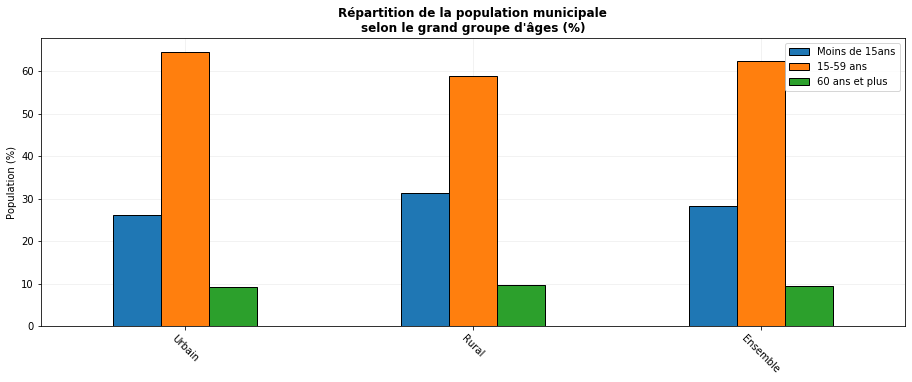

In [28]:
# 15
cat_age = {'mq_t':'Moins de 15ans',
           'qcq_t':'15-59 ans',
           'soix_t':'60 ans et plus'}

com_r_bool = dfcom['type_commune']=='Rural'

pop_r = dfcom['pop_t'][com_r_bool].sum()
pop_u = dfcom['pop_t'][~com_r_bool].sum()
pop_e = pop_r + pop_u

df_age = pd.DataFrame()

for key, label in cat_age.items():
    
    pop_r_age = (dfcom['pop_t'][com_r_bool] * dfcom[key][com_r_bool]).sum()
    pop_u_age = (dfcom['pop_t'][~com_r_bool] * dfcom[key][~com_r_bool]).sum()
    pop_e_age = pop_r_age + pop_u_age
    
    df_age.loc['Urbain', label] = round(pop_u_age / pop_u, 1)
    df_age.loc['Rural', label,] = round(pop_r_age / pop_r, 1)
    df_age.loc['Ensemble', label] = round(pop_e_age / pop_e, 1)
   
print(df_age.T)

fig = plt.figure()
axes = fig.add_axes([0,0,2,1])

df_age.plot.bar(ax=axes, edgecolor='black')
plt.ylabel('Population (%)')
plt.xticks(rotation=-45)
plt.title(label="Répartition de la population municipale\nselon le grand groupe d'âges (%)",
          fontweight='bold')
axes.set_axisbelow(True)
axes.grid(alpha=0.2)
plt.show()

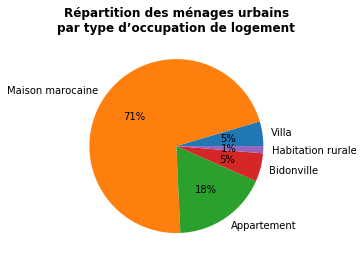

In [56]:
# 16 ménages urbains par type d’occupation de logement
log_type= {'villa_u':'Villa',
            'mm_u':'Maison marocaine',
            'appa_u':'Appartement',
            'som_u':'Bidonville',
            'rural_u':'Habitation rurale'}

com_u_bool = dfcom['type_commune']!='Rural'
df_temp = pd.DataFrame()
                       
for key, label in log_type.items():
    nb_log = (dfcom['NbMg_T'][com_u_bool] * dfcom[key][com_u_bool]/100).sum()                
    df_temp.loc[label, 'logement'] = nb_log


df_temp['logement'].plot.pie(autopct='%1.0f%%')
plt.title("Répartition des ménages urbains\npar type d’occupation de logement", fontweight='bold')
plt.ylabel('')
plt.show()

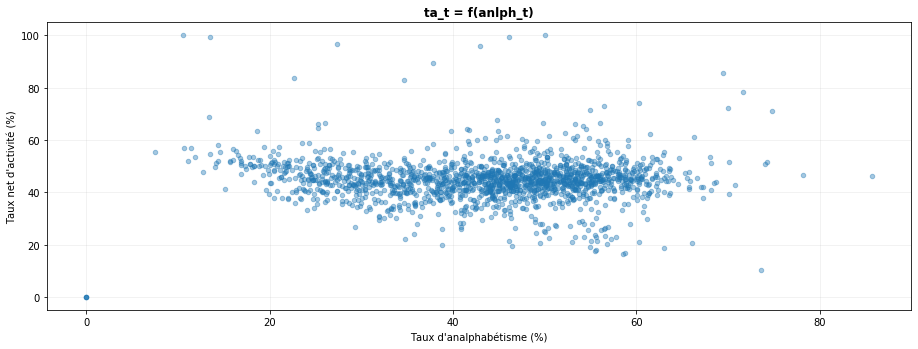

In [30]:
# 17 taux net d'activité (ta_t) vs taux d'analphabétisme de la pop +10ans (anlph_t)
# ta_t = f(anlph_t)
fig = plt.figure()
axes = fig.add_axes([0,0,2,1])

dfcom.sort_values('anlph_t').plot.scatter(x='anlph_t', y='ta_t', alpha=0.4, ax=axes)
plt.title("ta_t = f(anlph_t)", fontweight="bold")
plt.xlabel("Taux d'analphabétisme (%)")
plt.ylabel("Taux net d'activité (%)")
axes.set_axisbelow(True)
axes.grid(alpha=0.2)
plt.show()


Il faut insérer un commentaire ici

          Masculin    Féminin
Urbain   97.828358  97.895585
Rural    93.190326  90.314987
Ensembe  95.989482  94.890047


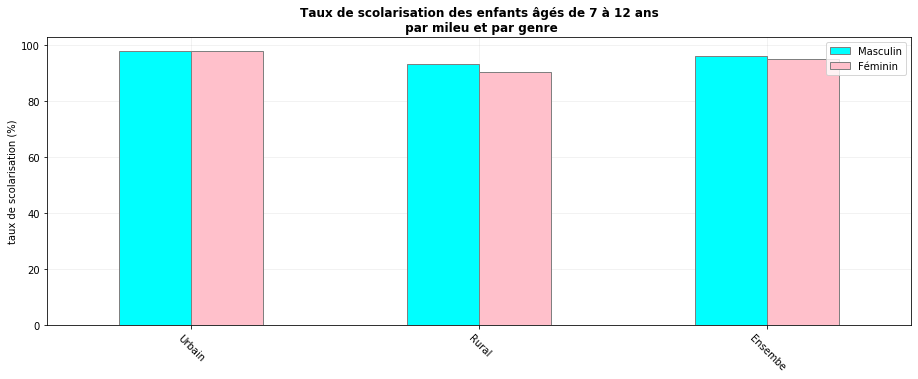

In [31]:
# 18 répartition du taux de scolarisation des enfants âgés de 7 à 12 ans par milieu et par genre au niveau des communes

fig = plt.figure()
axes = fig.add_axes([0,0,2,1])

df_scol = pd.DataFrame()

com_r_bool = dfcom['type_commune']=='Rural'


pop_r = dfcom['pop_t'][com_r_bool].sum()
pop_u = dfcom['pop_t'][~com_r_bool].sum()
pop_e = pop_r + pop_u

df_scol.loc['Urbain', 'Masculin'] = (dfcom['pop_t'][~com_r_bool] * dfcom['scol_m'][~com_r_bool]).sum() / pop_u
df_scol.loc['Urbain', 'Féminin'] = (dfcom['pop_t'][~com_r_bool] * dfcom['scol_f'][~com_r_bool]).sum() / pop_u
df_scol.loc['Rural', 'Masculin'] = (dfcom['pop_t'][com_r_bool] * dfcom['scol_m'][com_r_bool]).sum() / pop_r
df_scol.loc['Rural', 'Féminin'] = (dfcom['pop_t'][com_r_bool] * dfcom['scol_f'][com_r_bool]).sum() / pop_r

df_scol.loc['Ensembe', 'Masculin'] = (dfcom['pop_t'] * dfcom['scol_m']).sum() / pop_e
df_scol.loc['Ensembe', 'Féminin'] = (dfcom['pop_t'] * dfcom['scol_f']).sum() / pop_e

df_scol.plot.bar(ax=axes, color=['cyan', 'pink'], edgecolor='gray')

plt.ylabel('taux de scolarisation (%)')
plt.xticks(rotation=-45)
plt.title(label="Taux de scolarisation des enfants âgés de 7 à 12 ans\n par mileu et par genre",
          fontweight='bold')
axes.set_axisbelow(True)
axes.grid(alpha=0.2)
print(df_scol)
plt.show()

In [32]:
# 19_1 les facteurs explicatifs du taux de pauvreté globale
# milieu urbain
corrmat = dfcom[dfcom['type_commune']!='Rural'].corr()
corrmat['TPG2014_T'][corrmat['TPG2014_T'].abs()>0.5].sort_values(ascending=False)

TPG2014_T     1.000000
pauv2014_T    0.964261
volum_T       0.950801
DFP_Pmon_u    0.950402
sev_T         0.923496
vul_T         0.844724
DFP_ND_MM_    0.748202
IPP2014_T     0.618926
TPMulti201    0.617905
anlph_f       0.536634
anlph_t       0.530428
Name: TPG2014_T, dtype: float64

In [33]:
# 19_2 les facteurs explicatifs du taux de pauvreté globale
# milieu rural
corrmat = dfcom[dfcom['type_commune']=='Rural'].corr()
corrmat['TPG2014_T'][corrmat['TPG2014_T'].abs()>0.5].sort_values(ascending=False)

TPG2014_T     1.000000
TPMulti201    0.948359
IPP2014_T     0.942286
DFP_Pmul_u    0.867898
DFP_ND_MM_    0.833420
IPP2004_T     0.736516
pauv2014_T    0.724447
TPMulti200    0.717583
volum_T       0.688137
anlph_t       0.677313
anlph_m       0.649925
sev_T         0.649424
anlph_f       0.623600
DPSP_Clog2    0.615436
vul_T         0.614345
IPM2014_T     0.577042
IPM2004_T     0.532971
DPSP_AEEA2    0.528772
DPSP_sante   -0.545897
tv_t         -0.552246
wc_t         -0.637967
ref_t        -0.671764
Name: TPG2014_T, dtype: float64

In [34]:
# 19_3 les facteurs explicatifs du taux de pauvreté globale
# ensemble
corrmat = dfcom.corr()
corrmat['TPG2014_T'][corrmat['TPG2014_T'].abs()>0.5].sort_values(ascending=False)

TPG2014_T     1.000000
TPMulti201    0.953765
IPP2014_T     0.946701
DFP_Pmul_u    0.895787
DFP_ND_MM_    0.837435
IPP2004_T     0.811271
TPMulti200    0.798840
anlph_t       0.762665
pauv2014_T    0.759858
anlph_m       0.752477
anlph_f       0.727956
vul_T         0.719315
volum_T       0.714899
DPSP_Clog2    0.697423
sev_T         0.671456
IPM2014_T     0.650220
DPSP_AEEA2    0.622418
IPM2004_T     0.617378
eurp_t       -0.500806
prop_u       -0.502595
salr_f       -0.504857
mm_u         -0.504989
eau_t        -0.505473
elec_t       -0.516888
para_t       -0.552488
intr_t       -0.566376
ordi_t       -0.594860
tv_t         -0.611898
DPSP_sante   -0.640643
wc_t         -0.694746
ref_t        -0.733431
Name: TPG2014_T, dtype: float64

In [35]:
# 20 Supprimer de DataFrame dfcom toutes les colonnes dont le nom se terminent par « _u », « _r », « _m » ou « _f »

dfcom_cln = dfcom.drop([col for col in dfcom.columns if col.endswith(('_u', '_r', '_m', '_f'))], axis=1)
dfcom_cln.shape

(1687, 76)

In [36]:
# 21 Exporter dfcom vers une feuille nommée « commune »
dfcom_cln.to_excel('resultat_OEL_MBE.xlsx', sheet_name='commune', index=False)
#del dfcom_cln

In [37]:
# 22 DataFrame des Provinces : dfprov
cols = ['code_province', 'nom_province', 'pop_t', 'pop_u', 'pop_r', 'pop_m', 'pop_f',
        'NbMg_T', 'NbMg_U', 'NbMg_R', 'eau_t', 'elec_t']

code_prov = dfcom['code_province'].unique()
dfprov = pd.DataFrame(columns=cols)
data = {}

for code in code_prov:
    
    data['code_province'] = code
    data['nom_province'] =  dfcom['nom_province'][(dfcom['code_province']==code)].iloc[0]
    
    data['pop_r'] = dfcom['pop_t'][(dfcom['code_province']==code) & (dfcom['type_commune'] == 'Rural')].sum()
    data['pop_u'] = dfcom['pop_t'][(dfcom['code_province']==code) & (dfcom['type_commune'] != 'Rural')].sum()
    data['pop_t'] = data['pop_r'] + data['pop_u']
    
    data['pop_m'] = dfcom['pop_m'][(dfcom['code_province']==code)].sum()
    data['pop_f'] = dfcom['pop_f'][(dfcom['code_province']==code)].sum()
    
    data['NbMg_R'] = dfcom['NbMg_T'][(dfcom['code_province']==code) & (dfcom['type_commune'] == 'Rural')].sum()
    data['NbMg_U'] = dfcom['NbMg_T'][(dfcom['code_province']==code) & (dfcom['type_commune'] != 'Rural')].sum()
    data['NbMg_T'] = data['NbMg_R'] + data['NbMg_U'] 
    
    data['eau_t'] = dfcom['eau_t'][(dfcom['code_province']==code)].mean()
    data['elec_t'] = dfcom['elec_t'][(dfcom['code_province']==code)].mean()
    
    dfprov = dfprov.append(data, ignore_index=True)

dfprov

,code_province,nom_province,pop_t,pop_u,pop_r,pop_m,pop_f,NbMg_T,NbMg_U,NbMg_R,eau_t,elec_t
0,161.0,Chichaoua,369494.0,62218.0,307276.0,184472.0,185022.0,73928.0,13776.0,60152.0,55.543981,85.704015
1,351.0,Marrakech,1323005.0,974021.0,348984.0,654865.0,668140.0,302137.0,229063.0,73074.0,90.213455,94.143372
2,211.0,Essaouira,449133.0,105596.0,343537.0,225450.0,223683.0,95520.0,26873.0,68647.0,34.784701,81.149335
3,41.0,Al Haouz,571999.0,84205.0,487794.0,291795.0,280204.0,111627.0,18845.0,92782.0,80.024284,93.441302
4,191.0,El Kelaa des Sraghna,535753.0,152649.0,383104.0,271904.0,263849.0,97874.0,31920.0,65954.0,86.916035,94.758909
...,...,...,...,...,...,...,...,...,...,...,...,...
70,321.0,Laayoune,232416.0,229979.0,2437.0,119122.0,113294.0,53561.0,52860.0,701.0,44.724792,62.541937
71,537.0,Tarfaya,13028.0,7986.0,5042.0,7158.0,5870.0,3393.0,2092.0,1301.0,61.295091,63.310010
72,121.0,Boujdour,44440.0,42504.0,1936.0,23857.0,20583.0,10186.0,9511.0,675.0,43.244294,49.090560
73,66.0,Aousserd,2396.0,0.0,2396.0,1836.0,560.0,776.0,0.0,776.0,15.462930,31.780567


In [38]:
# 23 Exporter votre DataFrame « dfprov » vers la feuille « province »
with pd.ExcelWriter('resultat_OEL_MBE.xlsx', engine='openpyxl', mode='a') as writer:
    dfprov.sort_values('code_province').to_excel(writer, sheet_name='province', index=False)

In [39]:
# 24 DataFrame des Régions : dfreg
cols = ['code_region', 'nom_region', 'pop_t', 'pop_u', 'pop_r', 'pop_m', 'pop_f',
        'NbMg_T', 'NbMg_U', 'NbMg_R', 'eau_t', 'elec_t']

code_reg = dfcom['code_region'].unique()
dfreg = pd.DataFrame(columns=cols)
data = {}

for code in code_reg:
    
    data['code_region'] = code
    data['nom_region'] =  dfcom['nom_region'][(dfcom['code_region']==code)].iloc[0]
    
    data['pop_r'] = dfcom['pop_t'][(dfcom['code_region']==code) & (dfcom['type_commune'] == 'Rural')].sum()
    data['pop_u'] = dfcom['pop_t'][(dfcom['code_region']==code) & (dfcom['type_commune'] != 'Rural')].sum()
    data['pop_t'] = data['pop_r'] + data['pop_u']
    
    data['pop_m'] = dfcom['pop_m'][(dfcom['code_region']==code)].sum()
    data['pop_f'] = dfcom['pop_f'][(dfcom['code_region']==code)].sum()
    
    data['NbMg_R'] = dfcom['NbMg_T'][(dfcom['code_region']==code) & (dfcom['type_commune'] == 'Rural')].sum()
    data['NbMg_U'] = dfcom['NbMg_T'][(dfcom['code_region']==code) & (dfcom['type_commune'] != 'Rural')].sum()
    data['NbMg_T'] = data['NbMg_R'] + data['NbMg_U'] 
    
    data['eau_t'] = dfcom['eau_t'][(dfcom['code_region']==code)].mean()
    data['elec_t'] = dfcom['elec_t'][(dfcom['code_region']==code)].mean()
    
    dfreg = dfreg.append(data, ignore_index=True)

dfreg

,code_region,nom_region,pop_t,pop_u,pop_r,pop_m,pop_f,NbMg_T,NbMg_U,NbMg_R,eau_t,elec_t
0,7.0,Marrakech-Safi,4504767.0,1928525.0,2576242.0,2267818.0,2236949.0,928120.0,444856.0,483264.0,56.492146,87.558249
1,8.0,Draa-Tafilalet,1627269.0,555461.0,1071808.0,796405.0,830864.0,277998.0,114631.0,163367.0,75.608919,89.706438
2,9.0,Souss-Massa,2657906.0,1493198.0,1164708.0,1300313.0,1357593.0,601511.0,353802.0,247709.0,65.008580,89.586835
3,6.0,Grand Casablanca-Settat,6826773.0,5022475.0,1804298.0,3414102.0,3412671.0,1559404.0,1214427.0,344977.0,37.079278,89.549764
4,5.0,Béni Mellal-Khénifra,2512375.0,1233846.0,1278529.0,1236817.0,1275558.0,520174.0,287268.0,232906.0,48.743376,74.222914
5,4.0,Rabat-Salé-Kénitra,4552585.0,3172955.0,1379630.0,2262836.0,2289749.0,1015107.0,766852.0,248255.0,41.513117,82.324212
6,3.0,Fès-Meknès,4216957.0,2549791.0,1667166.0,2088237.0,2128720.0,919497.0,600113.0,319384.0,42.731149,85.470818
7,2.0,Oriental,2302182.0,1504517.0,797665.0,1141574.0,1160608.0,494530.0,338419.0,156111.0,42.848542,78.838358
8,1.0,Tanger-Tétouan-Al Hoceima,3540012.0,2120666.0,1419346.0,1795813.0,1744199.0,799124.0,525168.0,273956.0,28.556493,90.014054
9,10.0,Guelmim-Oued Noun,414489.0,270419.0,144070.0,201862.0,212627.0,90202.0,60873.0,29329.0,55.536448,79.246405


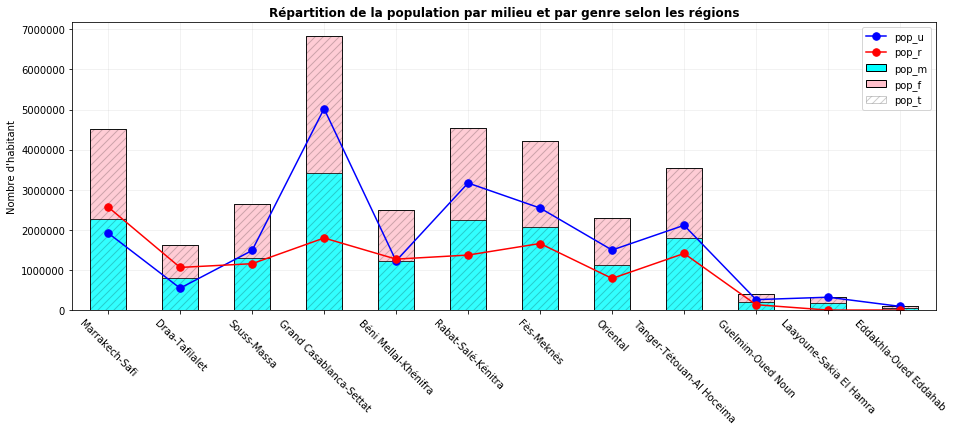

In [40]:
# 25 Répartition de la population par milieu et par genre selon les régions
fig = plt.figure()
axes = fig.add_axes([0,0,2,1])
dfreg.plot.bar(x='nom_region', y=['pop_m', 'pop_f'], ax=axes, stacked=True, color=['cyan', 'pink'], edgecolor='black')
dfreg.plot.bar(x='nom_region', y='pop_t', ax=axes, stacked=True, color='white', hatch='/'*3, edgecolor='black', alpha=0.2)
dfreg.plot(x='nom_region', y='pop_u', ax=axes, color='blue', style='.-', ms=15)
dfreg.plot(x='nom_region', y='pop_r', ax=axes, color='red', style='.-', ms=15)

axes.legend(loc='upper right')
plt.ylabel("Nombre d'habitant")
plt.xlabel(None)
plt.xticks(rotation=-45)
plt.title(label="Répartition de la population par milieu et par genre selon les régions",
          fontweight='bold')
axes.set_axisbelow(True)
axes.grid(alpha=0.2)
plt.show()


In [41]:
# 26 Exporter votre DataFrame « dfreg » vers la feuille « region »
with pd.ExcelWriter('resultat_OEL_MBE.xlsx', engine='openpyxl', mode='a') as writer:
    dfreg.sort_values('code_region').to_excel(writer, sheet_name='region', index=False)

                       Urbain  Rural  Total
                                           
Néant                    27.7   50.9   36.9
Préscolaire               5.2    3.8    4.7
Primaire                 26.6   30.2   28.0
Secondaire collégial     17.2   10.0   14.3
Secondaire qualifiant    14.2    3.6   10.0
Supérieur                 9.2    1.5    6.1


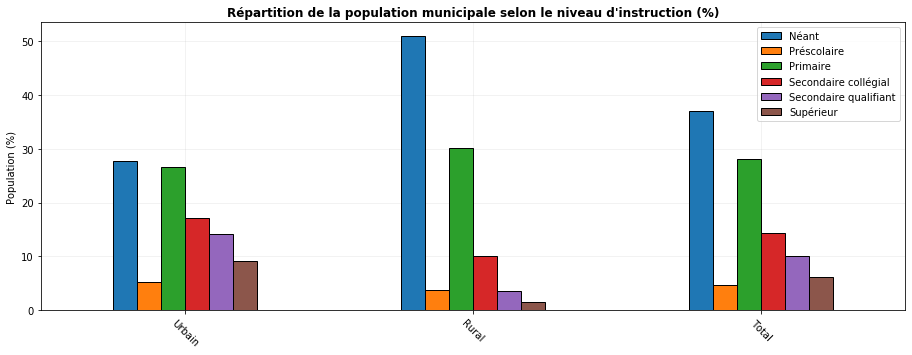

In [42]:
# 27_1 selon le niveau d'instruction (%)
df = pd.read_html('http://rgphentableaux.hcp.ma/Home', decimal=',', thousands='.')[6].set_index('Unnamed: 0')
df.index.rename('', inplace=True)

print(df)

fig = plt.figure()
axes = fig.add_axes([0,0,2,1])
df.T.plot.bar(ax=axes, edgecolor='black')
axes.set_axisbelow(True)
axes.grid(alpha=0.2)
plt.title("Répartition de la population municipale selon le niveau d'instruction (%)", fontweight='bold')
plt.ylabel('Population (%)')
plt.xticks(rotation=-45)
plt.show()

          Urbain  Rural  Total
                              
Masculin    15.2    8.3   12.4
Féminin     30.5   26.2   29.6
Total       19.3   10.5   16.2


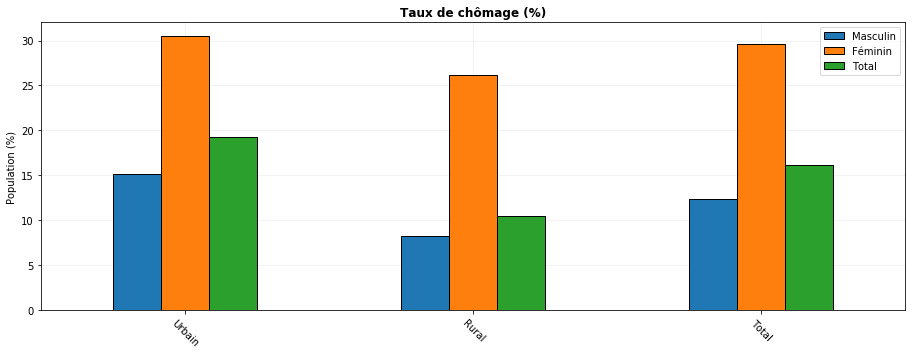

In [43]:
# 27_2 selon taux de chômage
df = pd.read_html('http://rgphentableaux.hcp.ma/Home', decimal=',', thousands='.')[7].set_index('Unnamed: 0')
df.index.rename('', inplace=True)

print(df)

fig = plt.figure()
axes = fig.add_axes([0,0,2,1])
df.T.plot.bar(ax=axes, edgecolor='black')
axes.set_axisbelow(True)
axes.grid(alpha=0.2)
plt.title("Taux de chômage (%)", fontweight='bold')
plt.ylabel('Population (%)')
plt.xticks(rotation=-45)
plt.show()

In [44]:
# 28 WEBSCRAPING: Aajouter à dfreg la répartition (totale et par milieu) des langues locales parlées au niveau de chaque région
from selenium import webdriver
from bs4 import BeautifulSoup

In [45]:
browser = webdriver.Chrome(r'C:\Users\BERKAK\msde_python_mini_projet\chromedriver_win32\chromedriver')
browser.get('http://rgphentableaux.hcp.ma/Default1/')

In [46]:
def seek_and_click(xpath):
    obj = browser.find_elements_by_xpath(xpath)[0] 
    obj.click()
    return obj

In [47]:
lang_opt = seek_and_click("//input[@text='Langues locales utilisées']")
reg_opt = seek_and_click("//input[@value='Region'][@id='CGEO']")

In [48]:
import time
langs = ['Darija', 'Tachelhit', 'Tamazight', 'Tarifit', 'Hassania']
suffixe = ['_t', '_u', '_r']
corr = {'Draa-Tafilalet':'Drâa-Tafilalet',
        'Grand Casablanca-Settat':'Casablanca-Settat',
        'Tanger-Tétouan-Al Hoceima':'Tanger-Tetouan-Al Hoceima'}

dflang = pd.DataFrame()
dflang = pd.DataFrame(columns=['dar_t', 'dar_u', 'dar_r',
                               'tac_t', 'tac_u', 'tac_r',
                               'tam_t', 'tam_u', 'tam_r',
                               'tar_t', 'tar_u', 'tar_r',
                               'has_t', 'has_u', 'has_r'])

for reg in dfreg['nom_region']:
    
    if reg in corr: reg = corr[reg]
    reg_list = seek_and_click("//input[@type='text'][@value='Choisir une entitée']")
    reg_choix = seek_and_click(f"//ul[@class='chosen-results']//li[contains(text(),'{reg}')]")
    afficher = seek_and_click("//input[@type='button'][@value='Afficher']")
    
    time.sleep(0.5)
    
    soup = BeautifulSoup(browser.page_source,'html')
    tables = soup.find_all('table')
    
    for i in range(len(tables)):
        
        tab_data = [[cell.text for cell in row.find_all(["th","td"])]
                                for row in tables[i].find_all("tr")]

        dftable = pd.DataFrame(tab_data)
        header = dftable.iloc[0].str.replace(' ', '')
        dftable = dftable[2:]
        dftable.columns = header
        dftable.set_index('Indicateur', inplace=True)

        for lang in langs:
            dflang.loc[reg, (lang[:3]+suffixe[i]).lower()] = float(dftable.loc[lang, 'Ensemble'])
    
    close_choix = seek_and_click("//a[@class='search-choice-close']")

dfreg =  pd.concat([dfreg, dflang.reset_index(drop=True)], axis=1)
dfreg

,code_region,nom_region,pop_t,pop_u,pop_r,pop_m,pop_f,NbMg_T,NbMg_U,NbMg_R,...,tac_r,tam_t,tam_u,tam_r,tar_t,tar_u,tar_r,has_t,has_u,has_r
0,7.0,Marrakech-Safi,4504767.0,1928525.0,2576242.0,2267818.0,2236949.0,928120.0,444856.0,483264.0,...,34.2,0.5,0.9,0.2,0.1,0.2,0,0.1,0.2,0.1
1,8.0,Draa-Tafilalet,1627269.0,555461.0,1071808.0,796405.0,830864.0,277998.0,114631.0,163367.0,...,24.1,48.5,39,53.5,0.1,0.1,0,0.2,0.3,0.2
2,9.0,Souss-Massa,2657906.0,1493198.0,1164708.0,1300313.0,1357593.0,601511.0,353802.0,247709.0,...,76.5,1.1,1.6,0.4,0.1,0.2,0,0.5,0.7,0.3
3,6.0,Grand Casablanca-Settat,6826773.0,5022475.0,1804298.0,3414102.0,3412671.0,1559404.0,1214427.0,344977.0,...,1.5,0.7,0.9,0.2,0.2,0.2,0.1,0,0.1,0
4,5.0,Béni Mellal-Khénifra,2512375.0,1233846.0,1278529.0,1236817.0,1275558.0,520174.0,287268.0,232906.0,...,14.7,30.2,21.7,38.4,0.1,0.2,0.1,0,0.1,0
5,4.0,Rabat-Salé-Kénitra,4552585.0,3172955.0,1379630.0,2262836.0,2289749.0,1015107.0,766852.0,248255.0,...,0.7,6.3,5.1,9.3,0.4,0.6,0.1,0.1,0.1,0
6,3.0,Fès-Meknès,4216957.0,2549791.0,1667166.0,2088237.0,2128720.0,919497.0,600113.0,319384.0,...,0.9,12.9,8.4,20,2.4,2,3.1,0,0,0
7,2.0,Oriental,2302182.0,1504517.0,797665.0,1141574.0,1160608.0,494530.0,338419.0,156111.0,...,1.7,6.5,4.1,11,36.5,30,48.7,0,0,0
8,1.0,Tanger-Tétouan-Al Hoceima,3540012.0,2120666.0,1419346.0,1795813.0,1744199.0,799124.0,525168.0,273956.0,...,1.3,0.6,0.9,0.2,10.3,10.5,10.2,0,0,0
9,10.0,Guelmim-Oued Noun,414489.0,270419.0,144070.0,201862.0,212627.0,90202.0,60873.0,29329.0,...,80.2,1.3,2,0.2,0.2,0.3,0,20.8,24.2,14.5


In [49]:
# 29 WEBSCRAPING: Ajouter à dfreg les informations concernant les offres de soin
dfsante = pd.DataFrame(columns = ['A', 'B'])
sante_list = []
for code in dfreg['code_region']:
    df = pd.read_html('http://cartesanitaire.sante.gov.ma/fr?p_idreg=' + str(int(code)), decimal=',', thousands='.')
    nb_hop = int(df[6].iloc[10, 1])
    nb_lits_ext = int(df[6].iloc[10, 2])
    nb_lits_fonc = int(df[6].iloc[10, 3])
    nb_cc_hemo = int(df[7].iloc[1, 1])
    nb_lits_urg = int(df[11].iloc[5, 2])
    nb_cli = int(df[15].iloc[0, 1])
    nb_off_pharma = int(df[15].iloc[4, 1])
    nb_lab = int(df[15].iloc[3, 1])
    nb_gen = int(df[17].iloc[2, 8])
    nb_spe = int(df[17].iloc[3, 8])
    nb_den = int(df[17].iloc[5, 8])
    nb_pharma = int(df[17].iloc[6, 8])
    nb_para = int(df[17].iloc[8, 8]) + int(df[17].iloc[9, 8]) + int(df[17].iloc[10, 8])
    
    sante_list.append([nb_hop, nb_lits_ext, nb_lits_fonc,
                        nb_cc_hemo, nb_lits_urg, nb_cli, nb_off_pharma,
                        nb_lab, nb_gen, nb_spe, nb_den, nb_pharma, nb_para])

dfsante = pd.DataFrame(sante_list, columns=['nb_hop', 'nb_lits_ext', 'nb_lits_fonc',
                                             'nb_cc_hemo', 'nb_lits_urg', 'nb_cli', 'nb_off_pharma',
                                             'nb_lab', 'nb_gen', 'nb_spe', 'nb_den', 'nb_pharma', 'nb_para'])

dfreg =  pd.concat([dfreg, dfsante.reset_index(drop=True)], axis=1)

dfreg

,code_region,nom_region,pop_t,pop_u,pop_r,pop_m,pop_f,NbMg_T,NbMg_U,NbMg_R,...,nb_cc_hemo,nb_lits_urg,nb_cli,nb_off_pharma,nb_lab,nb_gen,nb_spe,nb_den,nb_pharma,nb_para
0,7.0,Marrakech-Safi,4504767.0,1928525.0,2576242.0,2267818.0,2236949.0,928120.0,444856.0,483264.0,...,10,86,45,974,24,469,1150,28,11,4080
1,8.0,Draa-Tafilalet,1627269.0,555461.0,1071808.0,796405.0,830864.0,277998.0,114631.0,163367.0,...,7,41,4,193,5,160,219,11,5,1596
2,9.0,Souss-Massa,2657906.0,1493198.0,1164708.0,1300313.0,1357593.0,601511.0,353802.0,247709.0,...,9,56,23,637,31,233,324,18,9,2179
3,6.0,Grand Casablanca-Settat,6826773.0,5022475.0,1804298.0,3414102.0,3412671.0,1559404.0,1214427.0,344977.0,...,22,136,113,2373,237,758,1998,197,37,4862
4,5.0,Béni Mellal-Khénifra,2512375.0,1233846.0,1278529.0,1236817.0,1275558.0,520174.0,287268.0,232906.0,...,9,64,26,589,24,265,285,15,10,2043
5,4.0,Rabat-Salé-Kénitra,4552585.0,3172955.0,1379630.0,2262836.0,2289749.0,1015107.0,766852.0,248255.0,...,13,240,57,1389,77,598,981,78,31,4962
6,3.0,Fès-Meknès,4216957.0,2549791.0,1667166.0,2088237.0,2128720.0,919497.0,600113.0,319384.0,...,9,157,38,1064,60,503,1187,44,15,4390
7,2.0,Oriental,2302182.0,1504517.0,797665.0,1141574.0,1160608.0,494530.0,338419.0,156111.0,...,12,88,22,819,38,334,682,18,14,2732
8,1.0,Tanger-Tétouan-Al Hoceima,3540012.0,2120666.0,1419346.0,1795813.0,1744199.0,799124.0,525168.0,273956.0,...,15,77,30,734,50,392,428,32,18,2897
9,10.0,Guelmim-Oued Noun,414489.0,270419.0,144070.0,201862.0,212627.0,90202.0,60873.0,29329.0,...,3,25,1,100,2,71,133,8,4,894


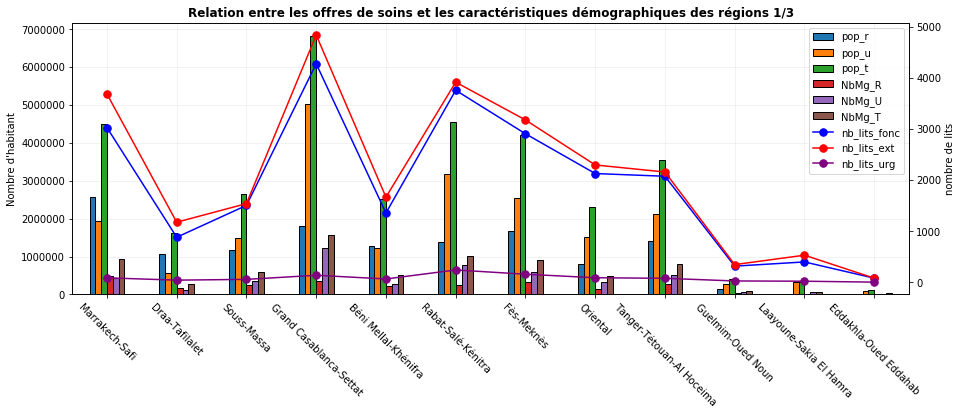

In [50]:
# 30
# nombre de lits
fig,ax1 = plt.subplots(figsize=(15, 5))
ax2 = ax1.twinx()
dfreg.plot.bar(x='nom_region', y=['pop_r', 'pop_u', 'pop_t', 'NbMg_R', 'NbMg_U', 'NbMg_T'], ax=ax1, stacked=False, legend=False, edgecolor='black')
dfreg.plot(x='nom_region', y='nb_lits_fonc', ax=ax2, color='blue', style='.-', ms=15, legend=False)
dfreg.plot(x='nom_region', y='nb_lits_ext', ax=ax2, color='red', style='.-', ms=15, legend=False)
dfreg.plot(x='nom_region', y='nb_lits_urg', ax=ax2, color='purple', style='.-', ms=15, legend=False)


fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
ax1.set_ylabel("Nombre d'habitant")
ax2.set_ylabel("nombre de lits")
ax1.set_xlabel(None)
ax1.set_xticklabels(dfreg['nom_region'], rotation=-45);
plt.title(label="Relation entre les offres de soins et les caractéristiques démographiques des régions 1/3",
          fontweight='bold')
ax1.set_axisbelow(True)
ax1.grid(alpha=0.2)
plt.show()

##### Analyse: 
- Globalement le nombre de lits disponible est proportionnel à la taille de la population de chaque région
- Le nombre de lit d’urgence au niveau de la région Rabat-Salé-Kénitra dépasse celle de la région Grand Casablanca-Settat malgré que la population de cette dernière est plus grande que celle de la première (+50%).

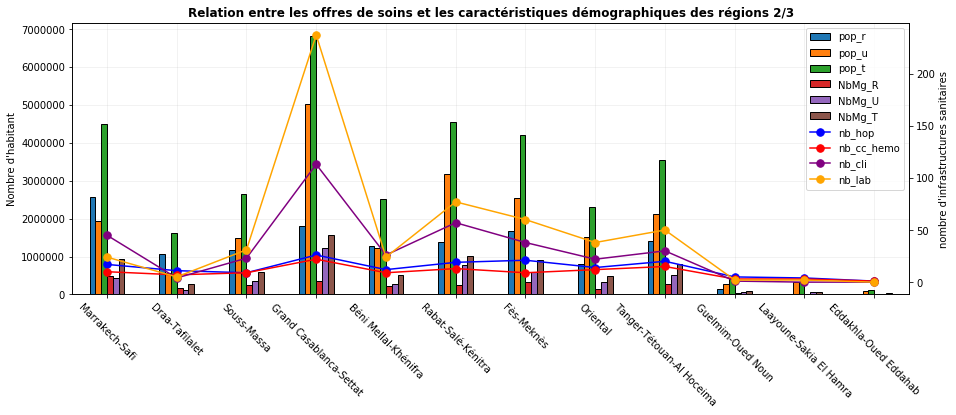

In [51]:
# 30_2
# nombre d'infrastructures sanitaires
fig,ax1 = plt.subplots(figsize=(15, 5))
ax2 = ax1.twinx()
dfreg.plot.bar(x='nom_region', y=['pop_r', 'pop_u', 'pop_t', 'NbMg_R', 'NbMg_U', 'NbMg_T'], ax=ax1, stacked=False, legend=False, edgecolor='black')
dfreg.plot(x='nom_region', y='nb_hop', ax=ax2, color='blue', style='.-', ms=15, legend=False)
dfreg.plot(x='nom_region', y='nb_cc_hemo', ax=ax2, color='red', style='.-', ms=15, legend=False)
dfreg.plot(x='nom_region', y='nb_cli', ax=ax2, color='purple', style='.-', ms=15, legend=False)
dfreg.plot(x='nom_region', y='nb_lab', ax=ax2, color='orange', style='.-', ms=15, legend=False)

fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
ax1.set_ylabel("Nombre d'habitant")
ax2.set_ylabel("nombre d'infrastructures sanitaires")
ax1.set_xlabel(None)
ax1.set_xticklabels(dfreg['nom_region'], rotation=-45);
plt.title(label="Relation entre les offres de soins et les caractéristiques démographiques des régions 2/3",
          fontweight='bold')
ax1.set_axisbelow(True)
ax1.grid(alpha=0.2)
plt.show()

##### Analyse: 
- La majorité de l'infrastructure sanitaire au Maroc est basée dans les régions de Casablanca-Settat et de Rabat-Salé-Kénitra


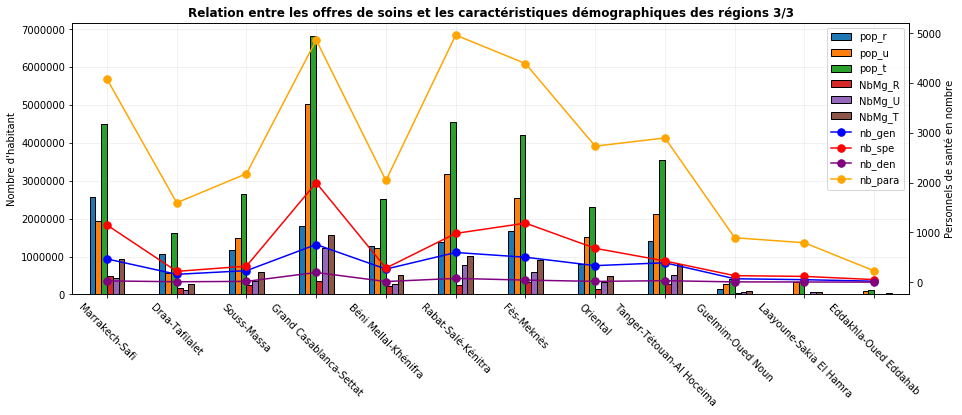

In [52]:
# 30_3
# Personnels de santé en nombre
fig,ax1 = plt.subplots(figsize=(15, 5))
ax2 = ax1.twinx()
dfreg.plot.bar(x='nom_region', y=['pop_r', 'pop_u', 'pop_t', 'NbMg_R', 'NbMg_U', 'NbMg_T'], ax=ax1, stacked=False, legend=False, edgecolor='black')
dfreg.plot(x='nom_region', y='nb_gen', ax=ax2, color='blue', style='.-', ms=15, legend=False)
dfreg.plot(x='nom_region', y='nb_spe', ax=ax2, color='red', style='.-', ms=15, legend=False)
dfreg.plot(x='nom_region', y='nb_den', ax=ax2, color='purple', style='.-', ms=15, legend=False)
dfreg.plot(x='nom_region', y='nb_para', ax=ax2, color='orange', style='.-', ms=15, legend=False)

fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
ax1.set_ylabel("Nombre d'habitant")
ax2.set_ylabel("Personnels de santé en nombre")
ax1.set_xlabel(None)
ax1.set_xticklabels(dfreg['nom_region'], rotation=-45);
plt.title(label="Relation entre les offres de soins et les caractéristiques démographiques des régions 3/3",
          fontweight='bold')
ax1.set_axisbelow(True)
ax1.grid(alpha=0.2)
plt.show()

##### Analyse: 
- D’une manière générale, Il se voit qu’il bien y a une relation entre les données démographiques et les offres de soins. Autrement dit, plus la taille de la population et le nombre de ménages augmentent plus les offres de soins croit aussi et vice versa.

In [53]:
# 31 Exporter votre DataFrame « dfreg » vers la feuille « region_2 »
with pd.ExcelWriter('resultat_OEL_MBE.xlsx', engine='openpyxl', mode='a') as writer:
    dfreg.to_excel(writer, sheet_name='region_2', index=False)